In this file, I analyse the output of the model ensemble generated with 'Pb-87_make-ensemble.py'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import time
import shap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
import xarray as xr


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
with open('Model_output/20240930-121807_Pb87/XGBoost-87pb_ensamble_predictions.csv', 'r', newline='') as f:
    ensamble_predictions = pd.read_csv(f)
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_208_207_rs90,Pb_208_207_rs91,Pb_208_207_rs92,Pb_208_207_rs93,Pb_208_207_rs94,Pb_208_207_rs95,Pb_208_207_rs96,Pb_208_207_rs97,Pb_208_207_rs98,Pb_208_207_rs99
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,2.448380,2.448151,2.447842,2.450449,2.444350,2.448639,2.449856,2.447264,2.444970,2.446395
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,2.448371,2.448142,2.447842,2.450460,2.444350,2.448575,2.449784,2.447253,2.444974,2.446152
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,2.448321,2.447966,2.447842,2.450460,2.444350,2.448572,2.449742,2.447207,2.444940,2.446094
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,2.446593,2.445775,2.446365,2.449352,2.444364,2.446095,2.449480,2.446925,2.441143,2.443466
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,2.447094,2.445655,2.446346,2.450299,2.444735,2.445735,2.449513,2.446925,2.441204,2.443784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,2.451007,2.450804,2.451607,2.451538,2.450099,2.450153,2.451016,2.449747,2.449775,2.450127
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,2.451224,2.450912,2.451615,2.450690,2.449984,2.451203,2.451220,2.449842,2.450096,2.450470
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,2.451809,2.451321,2.452145,2.451963,2.450983,2.451138,2.451484,2.450375,2.451351,2.450496
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,2.451615,2.450199,2.452103,2.451108,2.450025,2.450037,2.450782,2.449960,2.449578,2.449994


In [3]:
ensamble_predictions['Pb_87_mean'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_208_207_rs')]].mean(axis=1)
ensamble_predictions['Pb_87_std'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_208_207_rs')]].std(axis=1)
ensamble_predictions['Pb_87_CoV'] = ensamble_predictions['Pb_87_std'] / ensamble_predictions['Pb_87_mean'] * 100
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_208_207_rs93,Pb_208_207_rs94,Pb_208_207_rs95,Pb_208_207_rs96,Pb_208_207_rs97,Pb_208_207_rs98,Pb_208_207_rs99,Pb_87_mean,Pb_87_std,Pb_87_CoV
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,2.450449,2.444350,2.448639,2.449856,2.447264,2.444970,2.446395,2.447058,0.002038,0.083279
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,2.450460,2.444350,2.448575,2.449784,2.447253,2.444974,2.446152,2.447007,0.002031,0.083018
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,2.450460,2.444350,2.448572,2.449742,2.447207,2.444940,2.446094,2.446977,0.002024,0.082705
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,2.449352,2.444364,2.446095,2.449480,2.446925,2.441143,2.443466,2.445374,0.002298,0.093983
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,2.450299,2.444735,2.445735,2.449513,2.446925,2.441204,2.443784,2.445481,0.002287,0.093505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,2.451538,2.450099,2.450153,2.451016,2.449747,2.449775,2.450127,2.450302,0.000886,0.036145
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,2.450690,2.449984,2.451203,2.451220,2.449842,2.450096,2.450470,2.450532,0.000934,0.038130
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,2.451963,2.450983,2.451138,2.451484,2.450375,2.451351,2.450496,2.451088,0.000875,0.035694
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,2.451108,2.450025,2.450037,2.450782,2.449960,2.449578,2.449994,2.450487,0.000998,0.040746


In [4]:
prediction_df_latlon_idxs = ensamble_predictions.set_index(['WOD_latitude [degrees_north]', 'WOD_longitude [degrees_east]', 'Depth'])
prediction_df_latlon_idxs
prediction_xr = xr.Dataset.from_dataframe(prediction_df_latlon_idxs)
prediction_xr

<xarray.Dataset>
Dimensions:                       (WOD_latitude [degrees_north]: 167,
                                   WOD_longitude [degrees_east]: 360, Depth: 102)
Coordinates:
  * WOD_latitude [degrees_north]  (WOD_latitude [degrees_north]) float64 -76....
  * WOD_longitude [degrees_east]  (WOD_longitude [degrees_east]) float64 -179...
  * Depth                         (Depth) int64 0 5 10 15 ... 5300 5400 5500
Data variables: (12/117)
    Salinity                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Temperature                   (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Silicate                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Nitrate                       (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Phosphate                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Oxygen                        (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    ...                            ...
    Pb_208_207_rs97               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_208_207_rs98               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_208_207_rs99               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_87_mean                    (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_87_std                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_87_CoV                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...

In [5]:
lat = prediction_xr.variables['WOD_latitude [degrees_north]'][:]
lon = prediction_xr.variables['WOD_longitude [degrees_east]'][:]

In [6]:
variable_names = list(prediction_xr.keys())

surface_df = {}
intermediate_df = {}
deep_df = {}
bottom_df = {}

for variable in variable_names:
    if variable not in surface_df.keys():
        surface_df[variable] = []
    surface_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 10)[0][0]])
    if variable not in intermediate_df.keys():
        intermediate_df[variable] = []
    intermediate_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 1000)[0][0]])
    if variable not in deep_df.keys():
        deep_df[variable] = []
    deep_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 2500)[0][0]])
    if variable not in bottom_df.keys():
        bottom_df[variable] = []
    bottom_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 4000)[0][0]])


In [7]:
dfs = [surface_df, intermediate_df, deep_df, bottom_df]
ranges = [np.arange(5,20,5), np.arange(900,1150,50), np.arange(1900,2200,100), np.arange(3800,4300,100)]
titles =['10 m', '1000 m', '2500 m', '4000 m']

facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no ef

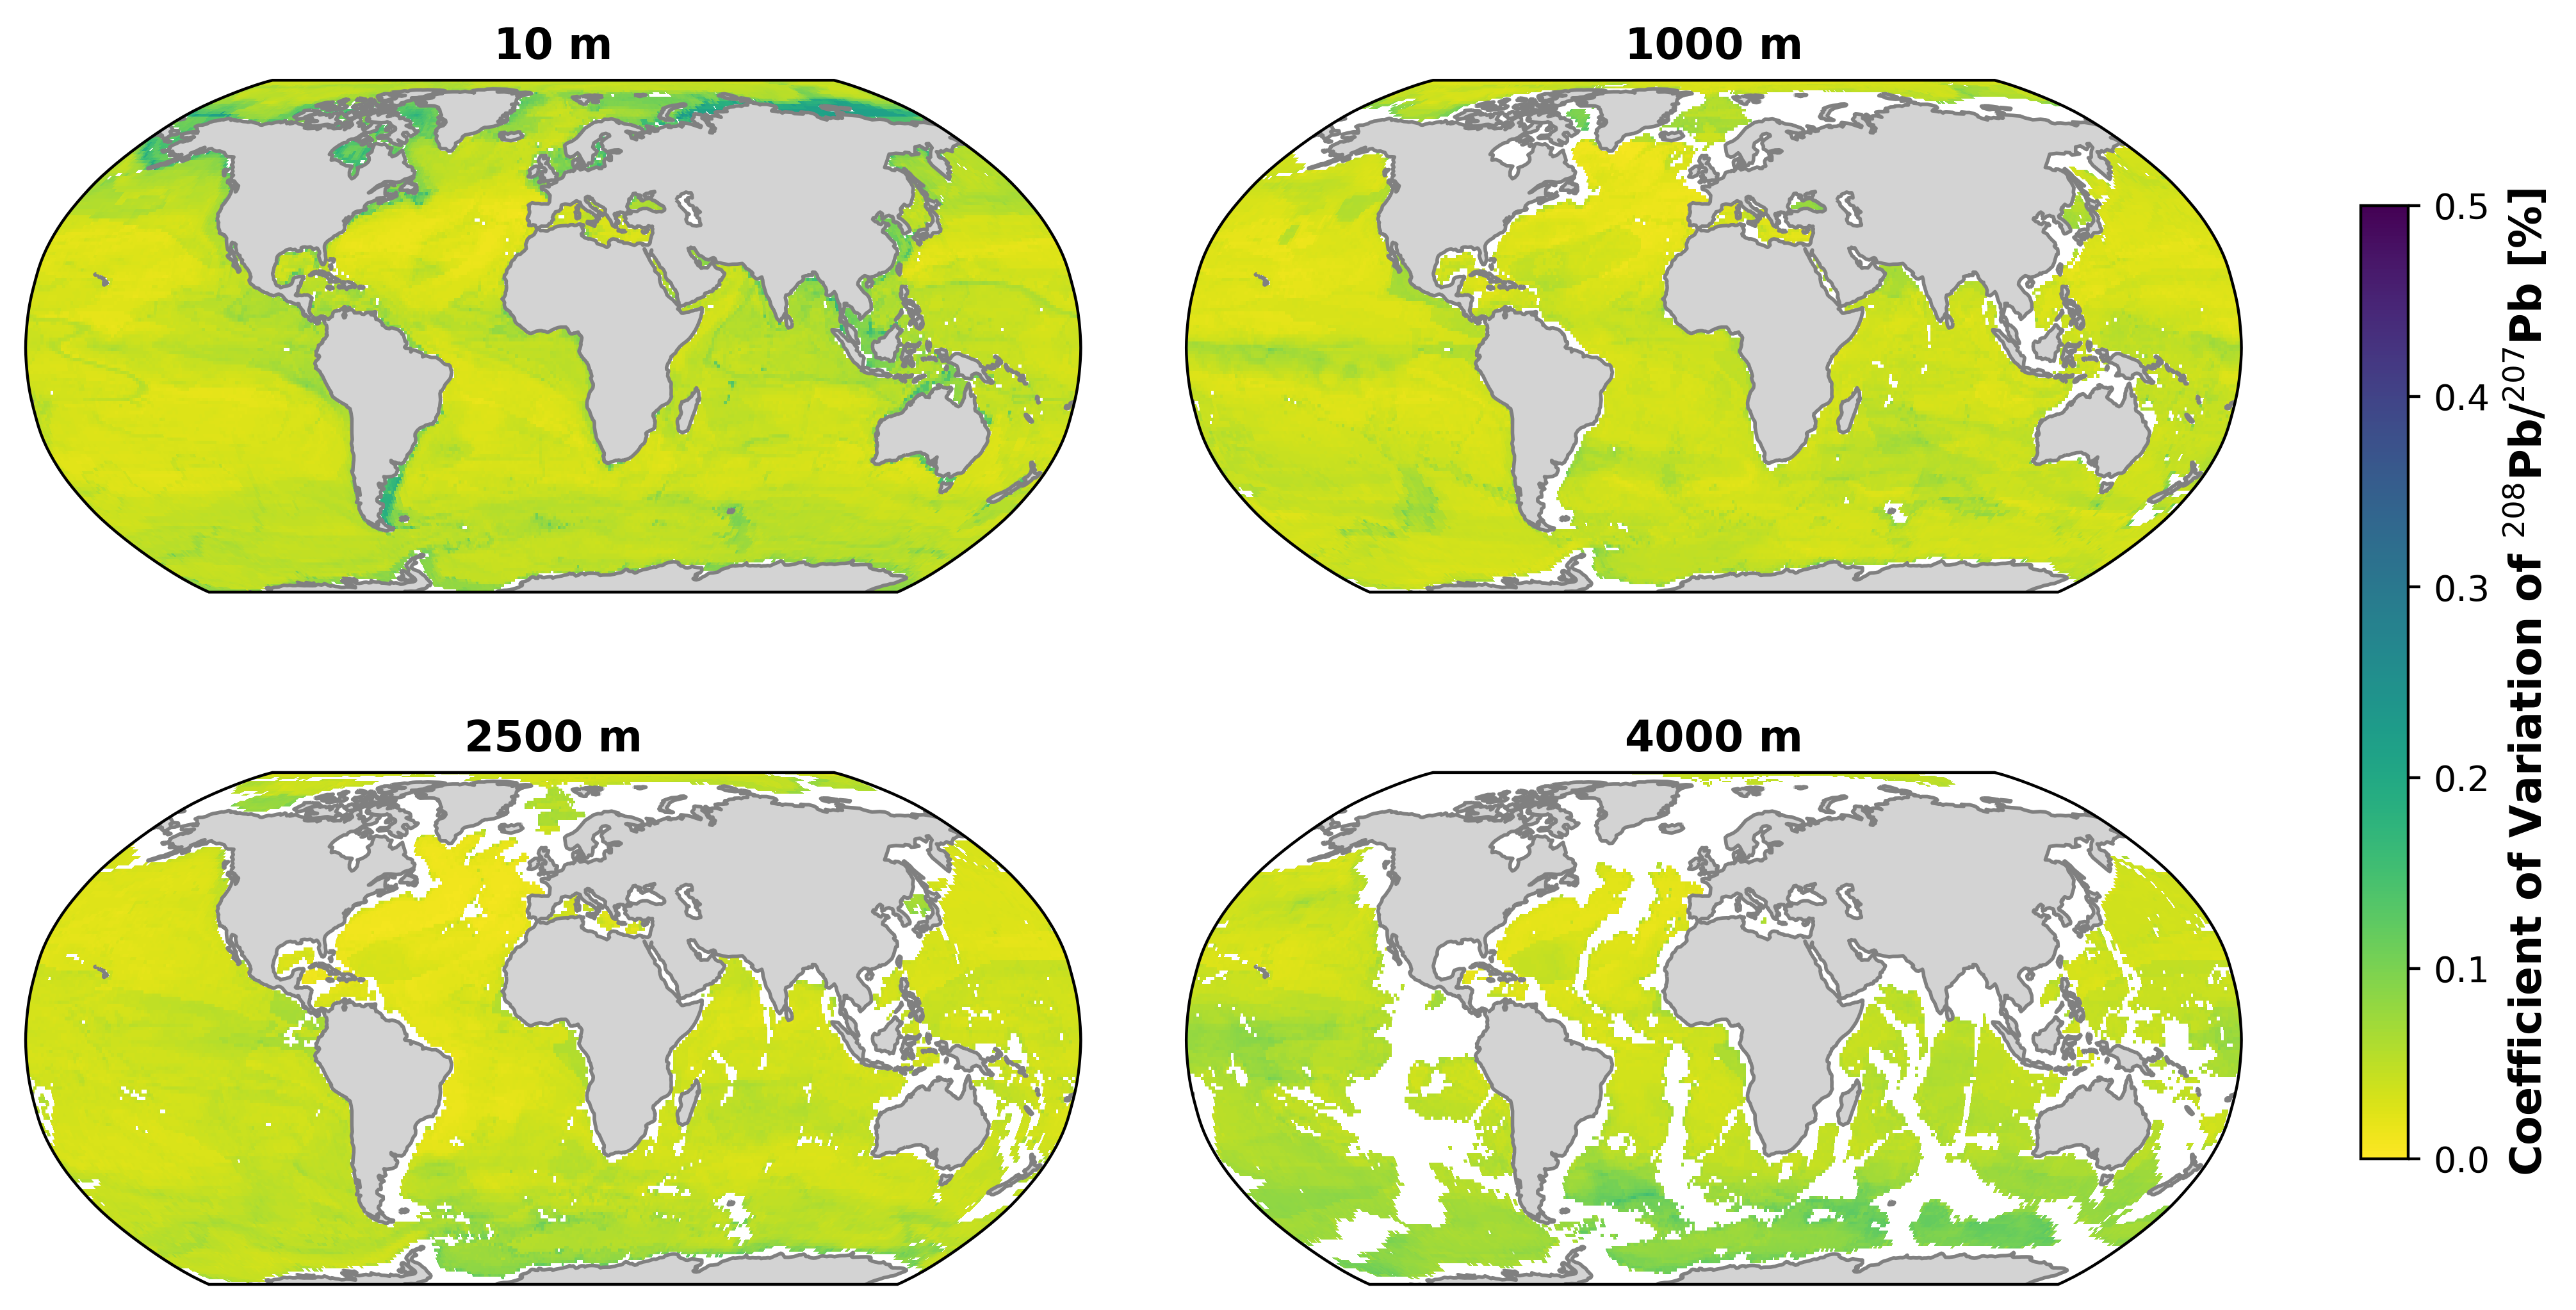

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12,7), dpi = 400, subplot_kw=dict(projection=ccrs.Robinson()), gridspec_kw = {'wspace':0.1, 'hspace':0.005})

for i, ax in enumerate(fig.axes):
    cs = ax.pcolormesh(lon, lat, dfs[i]['Pb_87_CoV'][0], cmap = 'viridis_r', vmin=0, vmax=0.5, transform=ccrs.PlateCarree(),alpha=1, shading='auto')
    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE, color = 'grey')
    ax.set_title(titles[i], fontweight='bold')
    
fig.colorbar(cs, ax=axes.ravel().tolist(), orientation = 'vertical', fraction = 0.02, pad = 0.05).set_label(label='Coefficient of Variation of $^{208}$Pb/$^{207}$Pb [%]', fontweight='bold', fontsize=12)

plt.savefig('../../Figures/For_ms/CoV-Pb_87.jpg')